# 주제 : LSTM을 활용해 주가 예측 모델 구현하기

이번 튜토리얼 에서는 다음과 같은 **프로세스 파이프라인**으로 주가 예측을 진행합니다.

- FinanceDataReader를 활용하여 주가 데이터 받아오기
- TensorFlow Dataset 클래스를 활용하여 주가 데이터 구축
- LSTM 을 활용한 주가 예측 모델 구축

## Step 1. 데이터 불러오기 및 EDA

### 문제 01. 필요한 모듈 import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os

%matplotlib inline
warnings.filterwarnings('ignore')

plt.rcParams['font.family'] = 'NanumGothic'

### 문제 02. FinanceDataReader import

**FinanceDataReader**는 주가 데이터를 편리하게 가져올 수 있는 파이썬 패키지입니다.

- [GitHub Repo](https://github.com/FinanceData/FinanceDataReader)

**FinanceDataReader**가 아직 설치 되지 않으신 분들은 아래의 주석을 해제한 후 명령어로 설치해 주시기 바랍니다.

In [2]:
!pip install finance-datareader

You should consider upgrading via the 'c:\users\상혁\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [3]:
import FinanceDataReader as fdr

### 문제 03. 삼성전자 데이터 불러오기

In [4]:
# 삼성전자(005930) 전체 (1996-11-05 ~ 현재)
samsung = fdr.DataReader('005930')

매우 편리하게 삼성전자 주가 데이터를 `DataFrame`형식으로 받아옵니다.

기본 **오름차순 정렬**이 된 데이터임을 알 수 있습니다.

### 컬럼 설명

- `Open`:   시가
- `High`:   고가
- `Low`:    저가
- `Close`:  종가
- `Volume`: 거래량
- `Change`: 대비

### 문제 04. 삼성전자 데이터 EDA

In [5]:
samsung.tail()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2021-06-30,81100,81400,80700,80700,13288643,-0.003704
2021-07-01,80500,80600,80000,80100,13382882,-0.007435
2021-07-02,80000,80400,79900,80000,8753097,-0.001248
2021-07-05,80100,80800,80000,80400,8330969,0.005000
2021-07-06,80600,81200,80500,81200,12078386,0.009950


**미국 주식 데이터**도 가져올 수 있습니다.

### 문제 05. 애플 데이터 불러오기

In [6]:
# Apple(AAPL), 애플
apple = fdr.DataReader('AAPL')

### 문제 06. 애플 데이터 EDA

In [7]:
apple.tail()

,Close,Open,High,Low,Volume,Change
Date,,,,,,
2021-06-29,136.33,134.82,136.49,134.38,64560000.0,0.0115
2021-06-30,136.96,136.13,137.38,135.89,63260000.0,0.0046
2021-07-01,137.27,136.68,137.30,135.77,52490000.0,0.0023
2021-07-02,139.96,137.90,140.00,137.74,78950000.0,0.0196
2021-07-06,141.44,140.17,141.52,140.16,12630000.0,0.0106


### 문제 07. 특정 시점(2017년) 이후 데이터 불러오기

In [8]:
# Apple(AAPL), 2017년
apple = fdr.DataReader('AAPL', '2017')

In [9]:
apple.head()

,Close,Open,High,Low,Volume,Change
Date,,,,,,
2017-01-03,29.04,28.95,29.08,28.69,115130000.0,0.0031
2017-01-04,29.00,28.96,29.13,28.94,84470000.0,-0.0014
2017-01-05,29.15,28.98,29.22,28.95,88770000.0,0.0052
2017-01-06,29.48,29.20,29.54,29.12,127010000.0,0.0113
2017-01-09,29.75,29.49,29.86,29.48,134250000.0,0.0092


### 문제 08. 날짜를 지정하여 특정 범위(40년간) 데이터 불러오기

In [10]:
# Ford(F), 1980-01-01 ~ 2019-12-30 (40년 데이터)
ford = fdr.DataReader('F', '1980-01-01', '2019-12-30')

In [11]:
ford.head()

,Close,Open,High,Low,Volume,Change
Date,,,,,,
1980-03-18,1.83,1.83,1.85,1.82,3770000.0,-0.0108
1980-03-19,1.85,1.85,1.86,1.83,1560000.0,0.0109
1980-03-20,1.86,1.86,1.88,1.85,1450000.0,0.0054
1980-03-21,1.78,1.78,1.85,1.76,5020000.0,-0.0430
1980-03-24,1.71,1.71,1.75,1.66,3330000.0,-0.0393


In [12]:
ford.tail()

,Close,Open,High,Low,Volume,Change
Date,,,,,,
2019-12-23,9.44,9.50,9.57,9.40,54800000.0,-0.0042
2019-12-24,9.47,9.44,9.49,9.43,11880000.0,0.0032
2019-12-26,9.45,9.47,9.49,9.43,28980000.0,-0.0021
2019-12-27,9.36,9.45,9.46,9.35,28270000.0,-0.0095
2019-12-30,9.25,9.34,9.35,9.23,36090000.0,-0.0118


### 문제 09. '금'과 '달러' 데이터도 가져올 수 있습니다. 두 데이터를 불러와 head를 출력해보세요.

*[GitHub 페이지 링크](https://github.com/FinanceData/FinanceDataReader) 참고

In [13]:
gold = fdr.DataReader('ZG') # 금 선물 (ICE)
gold.head()

,Close,Open,High,Low,Volume,Change
Date,,,,,,
1980-01-02,575.5,562.5,577.0,558.0,7260.0,0.0785
1980-01-03,625.0,627.0,640.0,603.0,20750.0,0.0860
1980-01-04,603.6,609.5,621.0,573.0,2660.0,-0.0342
1980-01-07,627.0,629.0,635.0,611.0,3000.0,0.0388
1980-01-08,602.5,611.5,619.0,600.0,750.0,-0.0391


In [14]:
usdkrw = fdr.DataReader('USD/KRW', '1995-01-01') 
usdkrw.head()

,Close,Open,High,Low,Change
Date,,,,,
1995-01-02,788.50,788.50,788.50,788.50,0.0000
1995-01-03,788.65,788.05,788.85,787.55,0.0002
1995-01-04,789.95,788.65,790.05,788.45,0.0016
1995-01-05,789.90,789.80,790.20,789.30,-0.0001
1995-01-06,791.55,789.75,791.65,789.65,0.0021


### 문제 10. 주식 코드를 활용해 데이터 불러오기

In [15]:
# 삼성전자 주식코드: 005930
STOCK_CODE = '005930'

In [16]:
# fdr 라이브러리를 활용해 삼성전자 데이터를 불러오세요 
stock = fdr.DataReader(STOCK_CODE)

In [17]:
stock.head()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
1997-06-30,1259,1290,1254,1260,100240,NaN
1997-07-01,1259,1286,1259,1269,167900,0.007143
1997-07-02,1277,1313,1277,1296,169940,0.021277
1997-07-03,1295,1304,1283,1290,108460,-0.004630
1997-07-04,1295,1304,1286,1296,101780,0.004651


In [18]:
stock.tail()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2021-06-30,81100,81400,80700,80700,13288643,-0.003704
2021-07-01,80500,80600,80000,80100,13382882,-0.007435
2021-07-02,80000,80400,79900,80000,8753097,-0.001248
2021-07-05,80100,80800,80000,80400,8330969,0.005000
2021-07-06,80600,81200,80500,81200,12078386,0.009950


In [19]:
# 인덱스를 확인해보세요.
stock.index

DatetimeIndex(['1997-06-30', '1997-07-01', '1997-07-02', '1997-07-03',
               '1997-07-04', '1997-07-05', '1997-07-07', '1997-07-08',
               '1997-07-09', '1997-07-10',
               ...
               '2021-06-23', '2021-06-24', '2021-06-25', '2021-06-28',
               '2021-06-29', '2021-06-30', '2021-07-01', '2021-07-02',
               '2021-07-05', '2021-07-06'],
              dtype='datetime64[ns]', name='Date', length=6000, freq=None)

## Step 2. 시계열 데이터 시각화


### 문제 11. 인덱스가 `DatetimeIndex`로 정의되어 있다면, 연도, 월, 일을 쪼갤 수 있습니다. 데이터를 분리해주세요.

In [20]:
stock['Year'] = stock.index.year
stock['Month'] = stock.index.month
stock['Day'] = stock.index.day

In [21]:
stock.head()

,Open,High,Low,Close,Volume,Change,Year,Month,Day
Date,,,,,,,,,
1997-06-30,1259,1290,1254,1260,100240,NaN,1997,6,30
1997-07-01,1259,1286,1259,1269,167900,0.007143,1997,7,1
1997-07-02,1277,1313,1277,1296,169940,0.021277,1997,7,2
1997-07-03,1295,1304,1283,1290,108460,-0.004630,1997,7,3
1997-07-04,1295,1304,1286,1296,101780,0.004651,1997,7,4


### 문제 12. 연도별, 월별 피봇테이블을 각각 구현해보세요.

In [22]:
stock.groupby(['Year', 'Month']).mean()

Open          High           Low         Close  \
Year Month                                                           
1997 6       1259.000000   1290.000000   1254.000000   1260.000000   
     7       1228.769231   1241.461538   1216.423077   1227.500000   
     8       1261.840000   1278.040000   1250.640000   1267.280000   
     9       1224.652174   1238.739130   1209.217391   1224.521739   
     10      1027.230769   1045.730769    995.307692   1014.000000   
...                  ...           ...           ...           ...   
2021 3      82250.000000  82763.636364  81609.090909  82072.727273   
     4      83786.363636  84150.000000  83095.454545  83586.363636   
     5      80547.368421  81105.263158  80015.789474  80521.052632   
     6      81195.454545  81590.909091  80740.909091  81104.545455   
     7      80300.000000  80750.000000  80100.000000  80425.000000   

                  Volume    Change        Day  
Year Month                                     
1997 6      1.002400e+05       NaN  30.000000  
     7      7.374308e+04 -0.003107  15.884615  
     8      1.537483e+05  0.003438  15.840000  
     9      6.507870e+04 -0.002450  15.086957  
     10     1.376285e+05 -0.020538  16.576923  
...                  ...       ...        ...  
2021 3      1.761874e+07 -0.000570  16.318182  
     4      1.695174e+07  0.000101  16.045455  
     5      1.853742e+07 -0.000592  16.684211  
     6      1.514088e+07  0.000147  15.318182  
     7      1.063633e+07  0.001567   3.500000  

[290 rows x 7 columns]

### 문제 13. matplotlib을 활용해 시간에 따른 주식 가격 시계열 그래프를 그려보세요.

Text(0, 0.5, 'price')

findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.


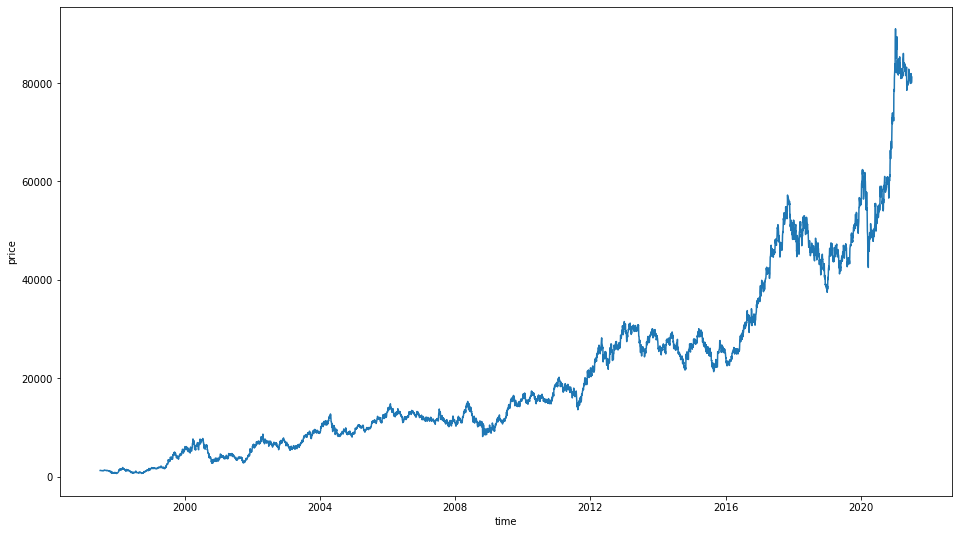

In [23]:
plt.figure(figsize=(16, 9))
sns.lineplot(y=stock['Close'], x=stock.index)
plt.xlabel('time')
plt.ylabel('price')

### 문제 14. subplots를 활용해 그래프 4개(2,2)를 동시에 그려보세요.

findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.


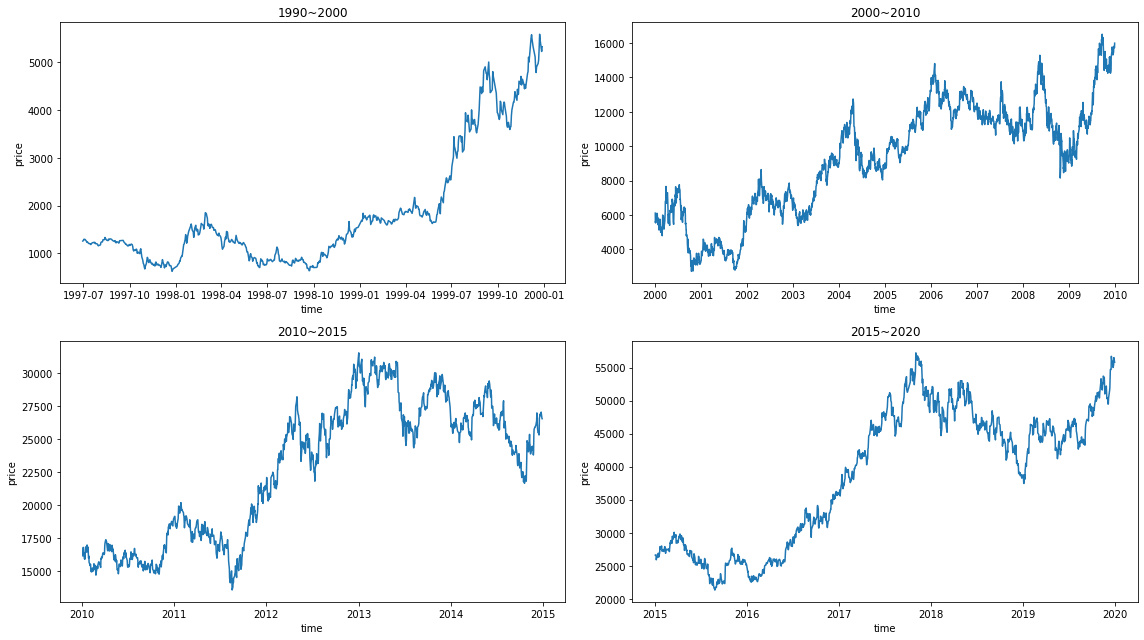

In [24]:
# 1990~2000, 2000~2010, 2010~2015, 2015~2020
time_steps = [['1990', '2000'], 
              ['2000', '2010'], 
              ['2010', '2015'], 
              ['2015', '2020']]

fig, axes = plt.subplots(2, 2)
fig.set_size_inches(16, 9)
for i in range(4):
    ax = axes[i//2, i%2]
    df = stock.loc[(stock.index > time_steps[i][0]) & (stock.index < time_steps[i][1])]
    sns.lineplot(y=df['Close'], x=df.index, ax=ax)
    ax.set_title(f'{time_steps[i][0]}~{time_steps[i][1]}')
    ax.set_xlabel('time')
    ax.set_ylabel('price')
plt.tight_layout()
plt.show()

## Step 3. 시계열 데이터의 전처리

### 문제 15. MinMaxScaler를 활요해 데이터 전처리를 수행합니다.

주가 데이터에 대하여 딥러닝 모델이 더 잘 학습할 수 있도록 **정규화(Normalization)**를 해주도록 하겠습니다.

**표준화 (Standardization)**와 **정규화(Normalization)**에 대한 내용은 아래 링크에서 더 자세히 다루니, 참고해 보시기 바랍니다.

- [데이터 전처리에 관하여](https://teddylee777.github.io/scikit-learn/scikit-learn-preprocessing)

In [25]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
# 스케일을 적용할 column을 정의합니다.
scale_cols = ['Open', 'High', 'Low', 'Close', 'Volume']
# 스케일 후 columns
scaled = scaler.fit_transform(stock[scale_cols])
scaled

array([[0.01394241, 0.01332645, 0.01401117, 0.0070043 , 0.00111   ],
       [0.01394241, 0.01328512, 0.01406704, 0.00710389, 0.00185923],
       [0.01414175, 0.01356405, 0.01426816, 0.00740265, 0.00188182],
       ...,
       [0.88593577, 0.83057851, 0.89273743, 0.87828223, 0.09692689],
       [0.88704319, 0.83471074, 0.89385475, 0.88270833, 0.09225248],
       [0.89258029, 0.83884298, 0.89944134, 0.89156053, 0.13374928]])

스케일이 완료된 column으로 새로운 데이터프레임을 생성합니다.

**시간 순으로 정렬**되어 있으며, datetime index는 제외했습니다.

*6,000개의 row, 5개 column*으로 이루어진 데이터셋이 DataFrame으로 정리되었습니다.

In [26]:
# 아래 코드는 그대로 실행해주세요.
df = pd.DataFrame(scaled, columns=scale_cols)

### 문제 16. 모델 학습을 위해 train 데이터와 test 데이터로 분할해주세요.

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
# Close 컬럼이 예측할 데이터입니다.
# test_size는 0.2, random_state는 0으로 지정해주세요.
# shuffle을 수행하지 않습니다.
x_train, x_test, y_train, y_test = train_test_split(df.drop('Close', 1), df['Close'], test_size=0.2, random_state=0, shuffle=False)

### 문제 17. train 데이터와 test 데이터의 shape을 각각 살펴봅니다.

In [29]:
x_train.shape, y_train.shape

((4800, 4), (4800,))

In [30]:
x_test.shape, y_test.shape

((1200, 4), (1200,))

In [31]:
x_train

,Open,High,Low,Volume
0,0.013942,0.013326,0.014011,0.001110
1,0.013942,0.013285,0.014067,0.001859
2,0.014142,0.013564,0.014268,0.001882
3,0.014341,0.013471,0.014335,0.001201
4,0.014341,0.013471,0.014369,0.001127
...,...,...,...,...
4795,0.347065,0.324380,0.342793,0.002733
4796,0.341307,0.322107,0.341006,0.002333
4797,0.345293,0.324380,0.345028,0.002320
4798,0.342193,0.325620,0.345251,0.002401


### 문제 18. TensroFlow Dataset을 활용해 시퀀스 데이터셋을 함수로 구현해주세요

In [32]:
import tensorflow as tf

In [33]:
def windowed_dataset(series, window_size, batch_size, shuffle):
    series = tf.expand_dims(series, axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    if shuffle:
        ds = ds.shuffle(1000)
    ds = ds.map(lambda w: (w[:-1], w[-1]))
    return ds.batch(batch_size).prefetch(1)

## Step 4. 모델 구현하기

### 문제 19. Hyperparameter를 정의하고 데이터에 적용해주세요.

In [38]:
# 아래 코드는 그대로 실행해주세요.
WINDOW_SIZE=20
BATCH_SIZE=32

In [39]:
# trian_data는 학습용 데이터셋, test_data는 검증용 데이터셋 입니다.
# WINDOW_SIZE와 BATCH_SIZE를 각 데이터셋에 적용해주세요.
train_data = windowed_dataset(y_train, WINDOW_SIZE, BATCH_SIZE, True)
test_data = windowed_dataset(y_test, WINDOW_SIZE, BATCH_SIZE, False)

In [40]:
# 아래의 코드로 데이터셋의 구성을 확인해 볼 수 있습니다. 그대로 실행해보고, 데이터의 shape을 살펴보세요.
# X: (batch_size, window_size, feature)
# Y: (batch_size, feature)
for data in train_data.take(1):
    print(f'데이터셋(X) 구성(batch_size, window_size, feature갯수): {data[0].shape}')
    print(f'데이터셋(Y) 구성(batch_size, window_size, feature갯수): {data[1].shape}')

데이터셋(X) 구성(batch_size, window_size, feature갯수): (32, 20, 1)
데이터셋(Y) 구성(batch_size, window_size, feature갯수): (32, 1)


### 문제 20. Sequential 모델을 구현합니다. 

In [41]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Conv1D, Lambda
from tensorflow.keras.losses import Huber
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


model = Sequential([
    # 1차원 feature map 생성합니다. filters는 32로, kernel_size는 5로 지정해주세요.
    Conv1D(filters=32, kernel_size=5,
           padding="causal",
           activation="relu",
           input_shape=[WINDOW_SIZE, 1]),
    # LSTM과 Dense 레이러를 사용해주세요. 활성함수는 각각 tanh와 relu로 지정합니다.
    LSTM(16, activation='relu'),
    Dense(16, activation="relu"),
    Dense(1),
])

### 문제 21. 모델을 Compile합니다. loss는 Huber 함수를 사용하고 optimizer는 Adam을 사용해주세요.

In [42]:
# Sequence 학습에 비교적 좋은 퍼포먼스를 내는 Huber()를 사용합니다.
loss = Huber()
optimizer = Adam(0.0005)
model.compile(loss=Huber(), optimizer=optimizer, metrics=['mse'])

In [43]:
# earlystopping은 10번 epoch통안 val_loss 개선이 없다면 학습을 멈춥니다.
earlystopping = EarlyStopping(monitor='val_loss', patience=10)
# val_loss 기준 체크포인터도 생성합니다.
filename = os.path.join('tmp', 'ckeckpointer.ckpt')
checkpoint = ModelCheckpoint(filename, 
                             save_weights_only=True, 
                             save_best_only=True, 
                             monitor='val_loss', 
                             verbose=1)

In [44]:
# callbacks로 앞에서 구현한 earlystopping과 checkpoint를 지정해주세요.
history = model.fit(train_data, 
                    validation_data=(test_data), 
                    epochs=50, 
                    callbacks=[checkpoint, earlystopping])

Epoch 1/50
150/150 [==============================] - 18s 72ms/step - loss: 5.5699e-05 - mse: 1.1140e-04 - val_loss: 0.0026 - val_mse: 0.0051

Epoch 00001: val_loss improved from inf to 0.00257, saving model to tmp\ckeckpointer.ckpt
Epoch 2/50
150/150 [==============================] - 11s 71ms/step - loss: 2.1201e-05 - mse: 4.2401e-05 - val_loss: 0.0020 - val_mse: 0.0040

Epoch 00002: val_loss improved from 0.00257 to 0.00201, saving model to tmp\ckeckpointer.ckpt
Epoch 3/50
150/150 [==============================] - 11s 71ms/step - loss: 1.9187e-05 - mse: 3.8374e-05 - val_loss: 0.0010 - val_mse: 0.0020

Epoch 00003: val_loss improved from 0.00201 to 0.00102, saving model to tmp\ckeckpointer.ckpt
Epoch 4/50
150/150 [==============================] - 11s 72ms/step - loss: 1.8071e-05 - mse: 3.6141e-05 - val_loss: 5.9818e-04 - val_mse: 0.0012

Epoch 00004: val_loss improved from 0.00102 to 0.00060, saving model to tmp\ckeckpointer.ckpt
Epoch 5/50
150/150 [==============================] 

## Step 5. 모델을 활용한 예측 및 결과 시각화

### 문제 24. 저장한 ModelCheckpoint 를 불러옵니다.

In [45]:
model.load_weights(filename)

### 문제 25. `test_data`를 활용하여 예측을 수행합니다.

In [46]:
pred = model.predict(test_data)

In [47]:
pred.shape

(1180, 1)

### 문제 26. matplotlib을 활용해 예측 데이터를 시각화해주세요.

아래 시각화 코드중 y_test 데이터에 **[20:]**으로 슬라이싱을 한 이유는

예측 데이터에서 20일치의 데이터로 21일치를 예측해야하기 때문에 test_data로 예측 시 *앞의 20일은 예측하지 않습니다.*

따라서, 20번 째 index와 비교하면 더욱 정확합니다.

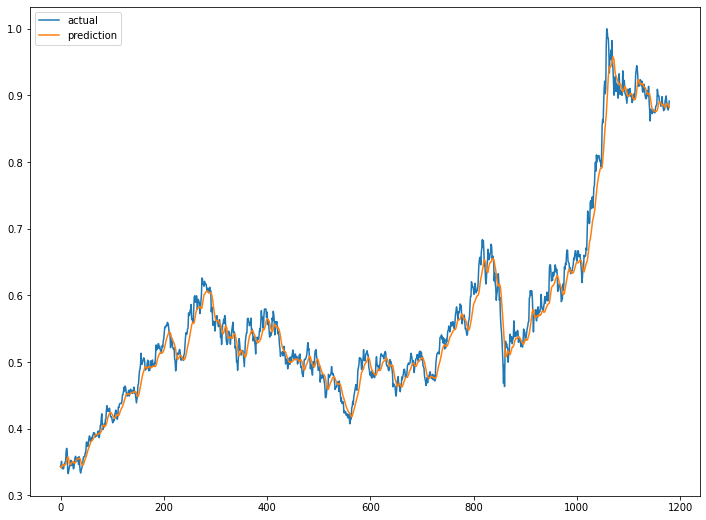

In [48]:
# 20일치의 데이터로 21일치를 예측하므로 test_data 사용시 이전 20일은 예측하지 않습니다.
# 따라서 y_test 데이터에 [20:]로 슬라이싱해주세요.
plt.figure(figsize=(12, 9))
plt.plot(np.asarray(y_test)[20:], label='actual')
plt.plot(pred, label='prediction')
plt.legend()
plt.show()